# Загрузка необходимых библиотек

In [1]:
import pandas as pd
!pip install xlrd 

In [2]:
!pip install openpyxl

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных

In [3]:
data = pd.read_csv('marketing.csv', sep=';',encoding='ANSI', decimal = ',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Client                   11912 non-null  object 
 1   client_id                11912 non-null  int64  
 2   Month                    11912 non-null  object 
 3   Category                 11912 non-null  object 
 4   Device                   11912 non-null  object 
 5   Place                    11912 non-null  object 
 6   BannerType               11912 non-null  object 
 7   QueryType (search only)  11912 non-null  object 
 8   TargetingType            11912 non-null  object 
 9   Shows                    11912 non-null  int64  
 10  Clicks                   11912 non-null  int64  
 11  Cost_rub_wo_NDS          11912 non-null  float64
 12  Сonversions              11912 non-null  int64  
 13  Unnamed: 13              1 non-null      object 
 14  Unnamed: 14           

In [5]:
data['Client'] = data['Client'].str.lower()
data['Category'] = data['Category'].str.lower()
data['Device'] = data['Device'].str.lower()
data['Place'] = data['Place'].str.lower()
data['TargetingType'] = data['TargetingType'].str.lower()

In [6]:
data['Cost_rub_wo_NDS'] = data['Cost_rub_wo_NDS'].astype(float).round(2)

In [7]:
data = data.drop(columns=['Unnamed: 13', 'Unnamed: 14']) 

In [8]:
data['Month'] = pd.to_datetime(data['Month'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   11912 non-null  object        
 1   client_id                11912 non-null  int64         
 2   Month                    11912 non-null  datetime64[ns]
 3   Category                 11912 non-null  object        
 4   Device                   11912 non-null  object        
 5   Place                    11912 non-null  object        
 6   BannerType               11912 non-null  object        
 7   QueryType (search only)  11912 non-null  object        
 8   TargetingType            11912 non-null  object        
 9   Shows                    11912 non-null  int64         
 10  Clicks                   11912 non-null  int64         
 11  Cost_rub_wo_NDS          11912 non-null  float64       
 12  Сonversions              11912 n

# Расчет

In [24]:
data_2020 = data.query('Month < "2020-01-09" and Month >"2019-01-12"')

In [98]:
data_metricks = (data_2020
                 .groupby(['Client', 'Category'])
                 .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
                 .reset_index()
                 .query('Category == "потребительское кредитование"')
                 .sort_values(by='Сonversions', ascending = False))
data_metricks['CTR'] = (data_metricks['Clicks']/data_metricks['Shows'] * 100).round(2)
data_metricks['CR'] = (data_metricks['Сonversions']/data_metricks['Clicks']*100).round(2)
data_metricks['Cost_for_conversions'] = (data_metricks['Cost_rub_wo_NDS']/data_metricks['Сonversions']).round(2)
print((data_metricks['Cost_rub_wo_NDS'].mean())/10**8)
print(data_metricks['Cost_rub_wo_NDS'].median()/10**8)
print(data_metricks)

0.47886494574444444
0.35150063870000003
    Client                      Category      Shows   Clicks  Cost_rub_wo_NDS  \
48   сигма  потребительское кредитование  261788561  3404128     5.956512e+07   
23  лямбда  потребительское кредитование  262457846  2284799     5.937816e+07   
7     бета  потребительское кредитование  853096987  3660762     1.240412e+08   
25    мета  потребительское кредитование  103372933  1405619     2.198198e+07   
12   гамма  потребительское кредитование  129667617   814553     2.858804e+07   
32   омега  потребительское кредитование    4234654   643215     2.979191e+07   
2    альфа  потребительское кредитование   36089573   582105     3.515006e+07   
41  псилон  потребительское кредитование   63422845   645735     3.757908e+07   
20    зета  потребительское кредитование    5200383  1243036     3.490289e+07   

    Сonversions    CTR     CR  Cost_for_conversions  
48       229930   1.30   6.75                259.06  
23       221762   0.87   9.71            

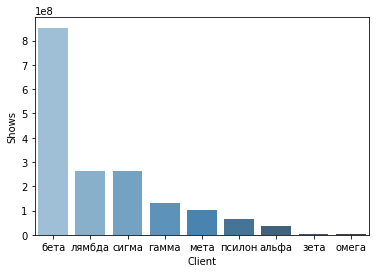

In [114]:
ax = sns.barplot(x="Client", y="Shows", data=data_metricks.sort_values(by='Shows', ascending = False), palette="Blues_d")
ax.set_ylabel('Shows')
plt.show()

Клиент: Омега
Категории: Потребительское кредитование
Период для анализа: янв – авг 2020
Цель клиента: получать больше целевых визитов по меньшей стоимости

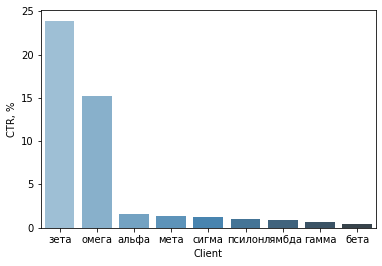

In [85]:
ax = sns.barplot(x="Client", y="CTR", data=data_metricks.sort_values(by='CTR', ascending = False), palette="Blues_d")
ax.set_ylabel('CTR, %')
plt.show()

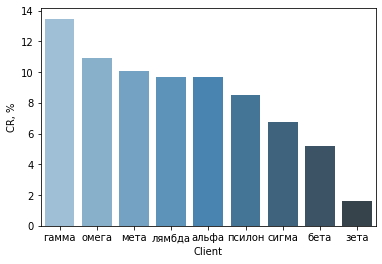

In [88]:
ax = sns.barplot(x="Client", y="CR", data=data_metricks.sort_values(by='CR', ascending = False), palette="Blues_d")
ax.set_ylabel('CR, %')
plt.show()

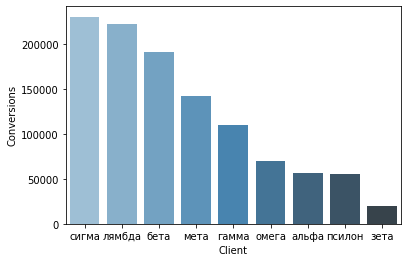

In [43]:
sns.barplot(x="Client", y="Сonversions", data=data_metricks, palette="Blues_d")
plt.show()

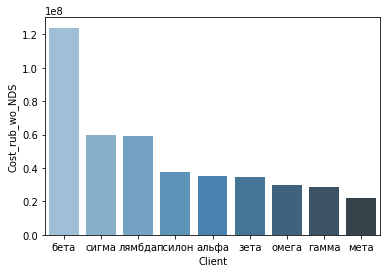

In [45]:
sns.barplot(x="Client", y="Cost_rub_wo_NDS", data=data_metricks.sort_values(by='Cost_rub_wo_NDS', ascending = False), palette="Blues_d")
plt.show()

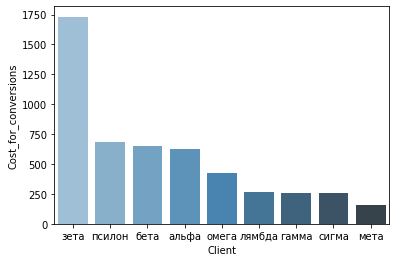

In [61]:
sns.barplot(x="Client", y="Cost_for_conversions", data=data_metricks.sort_values(by='Cost_for_conversions', ascending = False), palette="Blues_d")
plt.show()


In [48]:
data_omega = data_2020.query('Client == "омега" and Category == "потребительское кредитование" ')
data_omega 

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
1137,омега,333348,2020-01-08,потребительское кредитование,desktop,networks,image_ad,none,retargeting,0,0,0.00,0
8919,омега,333348,2020-01-01,потребительское кредитование,desktop,networks,text,none,phrase,0,0,0.00,0
8920,омега,333348,2020-01-01,потребительское кредитование,desktop,search,text,Brand,phrase,61842,8316,338391.69,371
8921,омега,333348,2020-01-01,потребительское кредитование,desktop,search,text,Competitor,phrase,6203,231,19671.53,9
8922,омега,333348,2020-01-01,потребительское кредитование,desktop,search,text,Other,phrase,90047,9247,785619.69,664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,омега,333348,2020-01-04,потребительское кредитование,mobile,networks,cpm_banner,none,retargeting,0,0,0.00,0
11696,омега,333348,2020-01-05,потребительское кредитование,mobile,networks,cpm_banner,none,retargeting,0,0,0.00,0
11697,омега,333348,2020-01-06,потребительское кредитование,mobile,networks,cpm_banner,none,retargeting,0,0,0.00,0
11698,омега,333348,2020-01-07,потребительское кредитование,mobile,networks,cpm_banner,none,retargeting,0,0,0.00,0


In [121]:
data_device = (data_omega
               .groupby('Device')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)
data_device['CTR'] = (data_device['Clicks']/data_device['Shows']*100).round(2)
data_device['CR'] = (data_device['Сonversions']/data_device['Clicks']*100).round(2)
data_device

,Device,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,desktop,2040545,249679,14078058.83,21917,12.24,8.78
1,mobile,2194109,393536,15713854.83,48266,17.94,12.26


In [122]:
data_BannerType = (data_omega
               .groupby('BannerType')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)
data_BannerType['CTR'] = (data_BannerType['Clicks']/data_BannerType['Shows']*100).round(2)
data_BannerType['CR'] = (data_BannerType['Сonversions']/data_BannerType['Clicks']*100).round(2)
data_BannerType

,BannerType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,cpm_banner,0,0,0.00,0,NaN,NaN
1,image_ad,0,0,0.00,0,NaN,NaN
2,text,4234654,643215,29791913.66,70183,15.19,10.91


In [123]:
data_TargetingType = (data_omega
               .groupby('TargetingType')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)

data_TargetingType['CTR'] = (data_TargetingType['Clicks']/data_TargetingType['Shows']*100).round(2)
data_TargetingType['CR'] = (data_TargetingType['Сonversions']/data_TargetingType['Clicks']*100).round(2)
data_TargetingType

,TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,autotargeting,0,0,0.00,0,NaN,NaN
1,phrase,4234654,643215,29791913.66,70182,15.19,10.91
2,retargeting,0,0,0.00,1,NaN,inf


In [138]:
data_place = (data_omega
               .groupby('Place')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)

data_place['CTR'] = (data_place['Clicks']/data_place['Shows']*100).round(2)
data_place['CR'] = (data_place['Сonversions']/data_place['Clicks']*100).round(2)
data_place

,Place,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,networks,0,0,0.00,1,NaN,inf
1,search,4234654,643215,29791913.66,70182,15.19,10.91


Рассмотрим весь датасет для категории потребительское кредитование


In [70]:
data_2020

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
0,бета,234679,2020-01-07,вклады,desktop,networks,cpc_video,none,phrase,0,0,0.00,0
20,псилон,285755,2020-01-02,кредитные карты,desktop,networks,cpc_video,none,retargeting,0,0,0.00,0
35,бета,234679,2020-01-07,потребительское кредитование,desktop,networks,cpc_video,none,phrase,1845674,8005,70685.55,0
36,бета,234679,2020-01-07,потребительское кредитование,desktop,networks,cpc_video,none,retargeting,315901,2042,18573.90,0
37,бета,234679,2020-01-07,потребительское кредитование,mobile,networks,cpc_video,none,phrase,34037,465,2974.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,микрон,449955,2020-01-08,страхование выезжающих за рубеж,desktop,networks,cpm_banner,none,phrase,0,0,0.00,0
11895,микрон,449955,2020-01-08,страхование выезжающих за рубеж,mobile,networks,cpm_banner,none,phrase,0,0,0.00,0
11906,псилон,285755,2020-01-01,страхование выезжающих за рубеж,desktop,networks,cpm_banner,none,retargeting,0,0,0.00,0
11907,псилон,285755,2020-01-02,страхование выезжающих за рубеж,desktop,networks,cpm_banner,none,retargeting,0,0,0.00,0


In [119]:
data_2020_device = (data_2020
               .query('Category == "потребительское кредитование"')
               .groupby('Device')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)
data_2020_device['CTR'] = (data_2020_device['Clicks']/data_2020_device['Shows']*100).round(2)
data_2020_device['CR'] = (data_2020_device['Сonversions']/data_2020_device['Clicks']*100).round(2)
data_2020_device

,Device,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,desktop,1171456317,4758847,1.694987e+08,370650,0.41,7.79
1,mobile,547875082,9925105,2.614798e+08,724427,1.81,7.30


In [137]:
data_2020_bannerType = (data_2020
               .query('Category == "потребительское кредитование"')
               .groupby('BannerType')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
               
               
)
data_2020_bannerType['CTR'] = (data_2020_bannerType['Clicks']/data_2020_bannerType['Shows']*100).round(2)
data_2020_bannerType['CR'] = (data_2020_bannerType['Сonversions']/data_2020_bannerType['Clicks']*100).round(2)
data_2020_bannerType.sort_values(by = ['CTR','CR'], ascending = False)

,BannerType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
3,mcbanner,2296928,21172,3.257112e+06,4484,0.92,21.18
5,text,1656676402,14447831,4.256590e+08,1089019,0.87,7.54
0,cpc_video,2351101,11763,1.016223e+05,3,0.50,0.03
2,image_ad,38485219,167233,1.583256e+06,1240,0.43,0.74
1,cpm_banner,19521749,35953,3.774813e+05,331,0.18,0.92
4,performance,0,0,0.000000e+00,0,NaN,NaN


In [117]:
data_2020_targeting = (data_2020
               .query('Category == "потребительское кредитование"')
               .groupby('TargetingType')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)
data_2020_targeting['CTR'] = (data_2020_targeting['Clicks']/data_2020_targeting['Shows']*100).round(2)
data_2020_targeting['CR'] = (data_2020_targeting['Сonversions']/data_2020_targeting['Clicks']*100).round(2)
data_2020_targeting


,TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,autotargeting,618761,30668,7.622038e+05,2700,4.96,8.80
1,phrase,1631557535,14292620,4.248817e+08,1081000,0.88,7.56
2,retargeting,87155103,360664,5.334577e+06,11377,0.41,3.15


In [140]:
data_2020_place = (data_2020
               .query('Category == "потребительское кредитование"')
               .groupby('Place')
               .agg({'Shows':'sum','Clicks':'sum','Cost_rub_wo_NDS':'sum','Сonversions':'sum'})
               .reset_index()
)
data_2020_place['CTR'] = (data_2020_place['Clicks']/data_2020_place['Shows']*100).round(2)
data_2020_place['CR'] = (data_2020_place['Сonversions']/data_2020_place['Clicks']*100).round(2)
data_2020_place

,Place,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR
0,networks,1663547324,5612101,7.391550e+07,136313,0.34,2.43
1,search,55784075,9071851,3.570630e+08,958764,16.26,10.57
